In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_hd=pd.read_csv("..\\datasets\\college-datas\\hd2022.csv",encoding='latin-1')

In [3]:
data_info=data_hd[['UNITID','INSTNM','ADDR','CITY','STABBR','ZIP','CONTROL']]
#CONTROL: 1: Public, 2: Private not-for-profit, 3: Private for profit, -3: Not Available

In [4]:
data_tuition=pd.read_csv("..\\datasets\\college-datas\\ic2022_ay.csv")

In [5]:
data_tuition=data_tuition[['UNITID','TUITION2','FEE2','TUITION3','FEE3','TUITION6','FEE6','TUITION7','FEE7','CHG5AY3','CHG7AY3']]
#TUITION2+FEE2 in state tuition and fees - undergraduate
#TUITION3+FEE3 out of state tuition and fees - undergraduate
#TUITION6+FEE6 in state tuition and fees - graduate
#TUITION7+FEE7 out of state tuition and fees - graduate
#CHG5AY3 On Campus Room & Board
#CHG7AY3 Off Campus Room & Board

In [6]:
data_tuition=data_tuition.replace({'.':np.nan,'0':np.nan})

In [7]:
data_admission=pd.read_csv("..\\datasets\\college-datas\\adm2022.csv")
data_admission.rename(columns={data_admission.columns[-1]:'ACTMT75'},inplace=True)

In [8]:
data_admission=data_admission[['UNITID','APPLCN','ADMSSN','ENRLT','SATNUM','SATPCT','ACTNUM','ACTPCT','SATVR25','SATVR50','SATVR75','SATMT25','SATMT50','SATMT75',
                              'ACTCM25','ACTCM50','ACTCM75','ACTEN25','ACTEN50','ACTEN75','ACTMT25','ACTMT50','ACTMT75']]
#APPLCN: Total applicant, ADMSSN: Total admission, ENRLT: Total enroll
#SATNUM, SATPCT, ACTNUM, ACTPCT: SAT/ACT submit numbers and percentage
#SATVR: SAT Evidence-Based Reading and Writing, SATMT: SAT Math, ACTCM: ACT Composite, ACTEN: ACT English, ACTMT: ACT Math

In [9]:
#data_admission=data_admission.fillna(0)
#data_admission.astype('int')

In [10]:
data_enroll=pd.read_csv("..\\datasets\\college-datas\\ef2022a.csv")
#EFALEVEL 1: All Students total, 2: All students Under, 12: All students Grad
#EFTOTLT: Total, EFAIANT:American Indian or Alaska Native total, EFASIAT:Asian total, EFBKAAT:Black or African American total
#EFHISPT:Hispanic total, EFNHPIT:Native Hawaiian or Other Pacific Islander total, EFWHITT:White total, EF2MORT:Two or more races total
#EFUNKNT: Race/ethnicity unknown total, EFNRALT:U.S. Nonresident total

In [11]:
data_majors=pd.read_csv("..\\datasets\\college-datas\\c2022_a.csv")
#CIPCODE
#MAJORNUM 1: First major, 2: second major
#AWLEVEL	3	Associate's degree
#AWLEVEL	5	Bachelor's degree
#AWLEVEL	7	Master's degree
#AWLEVEL	17	Doctor's degree - research/scholarship
#AWLEVEL	18	Doctor's degree - professional practice
#AWLEVEL	19	Doctor's degree - other
#AWLEVEL	20	Certificates of less than 12 weeks
#AWLEVEL	21	Certificates of at least 12 weeks but less than 1 year
#AWLEVEL	2	Certificates of at least 1 but less than 2 years
#AWLEVEL	4	Certificates of at least 2 but less than 4 years
#AWLEVEL	6	Postbaccalaureate certificate
#AWLEVEL	8	Post-master's certificate


In [12]:
data_info=data_info.merge(data_tuition,how='left',on='UNITID')

In [13]:
data_info.drop(['FEE2','TUITION3','FEE3',"TUITION6","FEE6","TUITION7","FEE7","CHG5AY3","CHG7AY3"],axis=1,inplace=True)

In [14]:
adm_rate=pd.DataFrame()

In [15]:
adm_rate=data_admission[['UNITID','APPLCN','ADMSSN']]

In [16]:
adm_rate['adm_rate']=adm_rate['ADMSSN']/adm_rate['APPLCN']

C:\Users\shich\AppData\Local\Temp\ipykernel_18456\2917193913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm_rate['adm_rate']=adm_rate['ADMSSN']/adm_rate['APPLCN']


In [17]:
adm_rate.drop(columns=['APPLCN','ADMSSN'],inplace=True)

C:\Users\shich\AppData\Local\Temp\ipykernel_18456\2650994827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm_rate.drop(columns=['APPLCN','ADMSSN'],inplace=True)


In [18]:
adm_rate

,UNITID,adm_rate
0,100654,0.683956
1,100663,0.866794
2,100706,0.781043
3,100724,0.965978
4,100751,0.800599
...,...,...
1986,498447,1.000000
1987,498456,1.000000
1988,498465,1.000000
1989,498562,0.939603


In [19]:
data_info=data_info.merge(adm_rate,how='left',on='UNITID')

In [20]:
data_majors_num=data_majors[data_majors['MAJORNUM']==1].groupby(['UNITID']).size().reset_index()
data_majors_num.rename(columns={0:'majors'},inplace=True)

In [21]:
data_info=data_info.merge(data_majors_num,how='left',on='UNITID')

In [22]:
data_student_number=data_enroll[data_enroll['EFALEVEL']==2][['UNITID','EFTOTLT']]
data_student_number.rename(columns={'EFTOTLT':'student_number'},inplace=True)

In [23]:
data_info=data_info.merge(data_student_number,how='left',on='UNITID')

In [24]:
data_info.dropna(inplace=True)
data_info['TUITION2']=data_info['TUITION2'].astype('int')

In [25]:
data_info

,UNITID,INSTNM,ADDR,CITY,STABBR,ZIP,CONTROL,TUITION2,adm_rate,majors,student_number
0,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,1,8610,0.683956,66.0,5206.0
1,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,8832,0.866794,204.0,13032.0
3,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,10120,0.781043,117.0,7169.0
4,100724,Alabama State University,915 S Jackson Street,Montgomery,AL,36104-0271,1,8328,0.965978,67.0,3296.0
6,100751,The University of Alabama,739 University Blvd,Tuscaloosa,AL,35487-0100,1,11100,0.800599,238.0,32458.0
...,...,...,...,...,...,...,...,...,...,...,...
6210,498049,Arizona College-Southfield,26200 Lasher Road Suite 400,Southfield,MI,48033-7157,3,21546,1.000000,2.0,297.0
6242,498447,Arizona College-Falls Church,3130 Fairview Park Drive Suite 800,Falls Church,VA,22042-4566,3,21546,1.000000,2.0,144.0
6243,498456,Arizona College-Ontario,3401 North Centre Lake Drive,Ontario,CA,91761-1201,3,27866,1.000000,2.0,210.0
6254,498562,Commonwealth University of Pennsylvania,400 East Second Street,Bloomsburg,PA,17815,1,7716,0.939603,147.0,11016.0


In [26]:
data_info=data_info[data_info['majors']>10]
data_info=data_info[data_info['student_number']>2000]

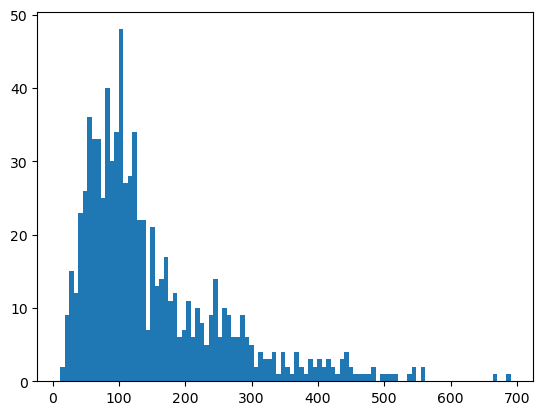

In [27]:
plt.hist(data_info['majors'],bins=100)
plt.show()

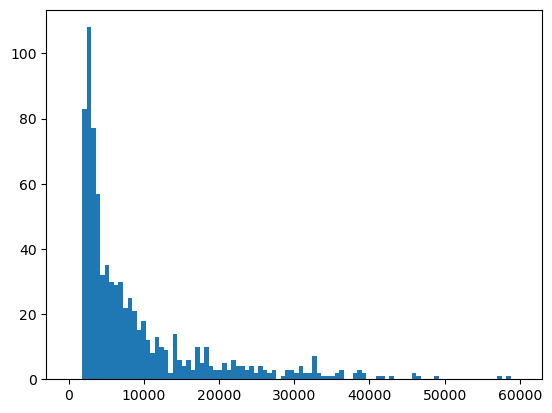

In [28]:
plt.hist(data_info['student_number'],bins=100,range=(0,60000))
plt.show()

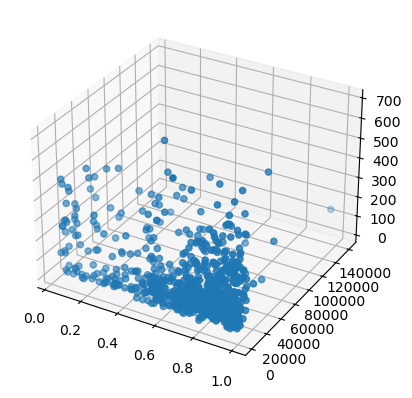

In [29]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(data_info['adm_rate'],data_info['student_number'],data_info['majors'])
plt.show()

In [30]:
from sklearn.cluster import KMeans

In [31]:
x=np.array(data_info[['student_number','adm_rate','TUITION2','majors']])

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.p

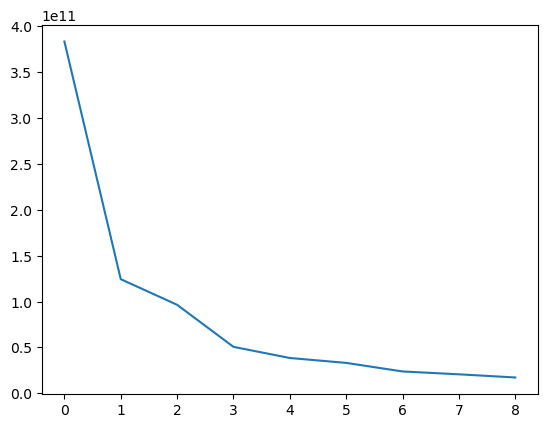

In [32]:
wccs=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wccs.append(model.inertia_)
plt.plot(wccs)

In [33]:
model=KMeans(n_clusters=4)
model.fit(x)
data_info['KMeansType']=model.labels_

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


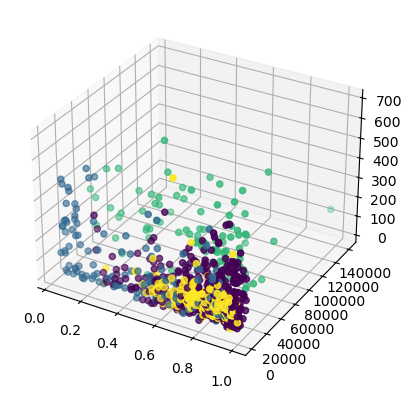

In [34]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.scatter(data_info['adm_rate'],data_info['student_number'],data_info['majors'],c=data_info['KMeansType'])
plt.show()

In [100]:
uniteID=243744
adm=pd.DataFrame(columns=['ENRLFT','adm_rate'])
for i in range(2004,2014):
    df=pd.read_csv("..\\datasets\\college-datas\\admission\\ic"+str(i)+".csv")
    df=df[df['UNITID']==uniteID]
    df.index=[i]
    adm=pd.concat([adm,df])
for i in range(2014,2023):
    df=pd.read_csv("..\\datasets\\college-datas\\admission\\adm"+str(i)+".csv")
    df=df[df['UNITID']==uniteID]
    df.index=[i]
    adm=pd.concat([adm,df])
adm.index=pd.to_datetime(adm.index,format='%Y')
adm['ADMSSN']=adm['ADMSSN'].astype(int)
adm['APPLCN']=adm['APPLCN'].astype(int)
adm['ENRLFT']=adm['ENRLFT'].astype(int)
adm['adm_rate']=adm['ADMSSN']/adm['APPLCN']
adm=adm[['ENRLFT','adm_rate']]

C:\Users\shich\AppData\Local\Temp\ipykernel_28632\3169441867.py:4: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("..\\datasets\\college-datas\\admission\\ic"+str(i)+".csv")


In [101]:
for i in range(1,5):
    adm['ENRLFT-shift+'+str(i)]=adm['ENRLFT'].shift(i)
    #adm['ENRLFT-shift-'+str(i)]=adm['ENRLFT'].shift(-i)

In [102]:
adm.corr()

,ENRLFT,adm_rate,ENRLFT-shift+1,ENRLFT-shift+2,ENRLFT-shift+3,ENRLFT-shift+4
ENRLFT,1.000000,-0.446897,0.070855,-0.287567,-0.057427,0.105571
adm_rate,-0.446897,1.000000,-0.392023,-0.364906,-0.608158,-0.519346
ENRLFT-shift+1,0.070855,-0.392023,1.000000,-0.021446,-0.200400,-0.066053
ENRLFT-shift+2,-0.287567,-0.364906,-0.021446,1.000000,0.239264,-0.231354
ENRLFT-shift+3,-0.057427,-0.608158,-0.200400,0.239264,1.000000,0.314953
ENRLFT-shift+4,0.105571,-0.519346,-0.066053,-0.231354,0.314953,1.000000


Text(0.5, 1.0, 'adm_rate VS Enrollment')

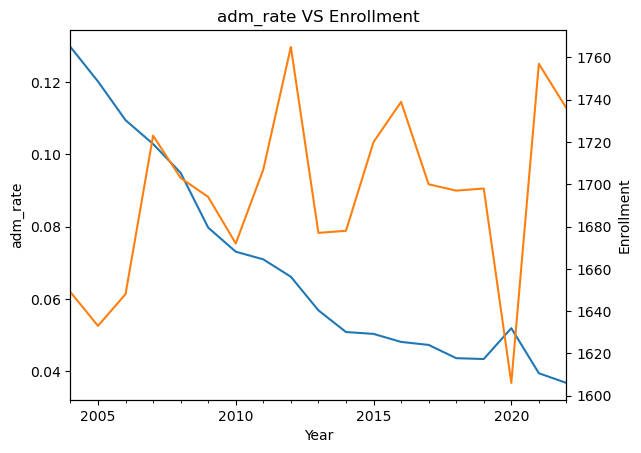

In [108]:
ax1=adm['adm_rate'].plot()
ax2=adm['ENRLFT'].plot(ax=ax1,secondary_y=True)
ax1.set_ylabel('adm_rate')
ax2.set_ylabel('Enrollment')
ax1.set_xlabel('Year')
ax1.set_title('adm_rate VS Enrollment')